In [ ]:
cd /scratch/tsany/clim711/gfdl_spectral_code/t85barotropic

/scratch/tsany/clim711/gfdl_spectral_code/t85barotropic


In [ ]:
ls

 00000000.logfile.000000.out   barotropic.nc    eddy_change_1/   eddy_change_6/
 00000000.time_stamp.out       barotropic.x*    eddy_change_2/   eddy_change_7/
 INPUT/                        data_table       eddy_change_3/   eddy_change_8/
'Lat Profile.png'              diag_table       eddy_change_4/   input.nml
 RESTART/                      eddy_change_0/   eddy_change_5/   rr.png


In [ ]:
# eddy_change_1 = 0.0
# eddy_change_2 = 5.0
# eddy_change_3 = 10.0
# default = 15.0
# eddy_change_4 = 20.0
# eddy_change_5 = 25.0
# eddy_change_0 = 30.0;
# Eddy_change_6 = 40.0

# Eddy_change_7 = 60.0
# eddy_change_8 = 90.0
# 9==default

`Question:` How does the latitude width of the initial vorticity disturbance ('eddy_width') in the barotropic atmosphere model influence the lifecycle and propagation characteristics of the Rossby waves?

`Hypothesis:` In the barotropic model, the Eddy Width plays a crucial role in determining the behavior of Rossby waves. A wider 'eddy_width' results in Rossby waves that have a longer lifespan and will move slowly. In contrast, narrower disturbances lead to shorter-lived and faster-moving Rossby waves. 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.util import add_cyclic_point
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

In [ ]:
eddy_changes = {}

for i in range(9):
    path = f'/scratch/tsany/clim711/gfdl_spectral_code/t85barotropic/eddy_change_{i}/'
    eddy_changes[f'eddy_change_{i}'] = xr.open_dataset(f'{path}barotropic.nc', decode_times=False)


In [ ]:
# Reorganize 
ds_0 = eddy_changes['eddy_change_1']
ds_5 = eddy_changes['eddy_change_2']
ds_10 = eddy_changes['eddy_change_3']
ds_15 = xr.open_dataset('/scratch/tsany/clim711/gfdl_spectral_code/t85barotropic/barotropic.nc', decode_times=False)
ds_20 = eddy_changes['eddy_change_4']
ds_25 = eddy_changes['eddy_change_5']
ds_30 = eddy_changes['eddy_change_0']
ds_40 = eddy_changes['eddy_change_6']

ds_60 = eddy_changes['eddy_change_7']
ds_90 = eddy_changes['eddy_change_8']

In [ ]:
# Reorganize
ds_20

<xarray.Dataset>
Dimensions:   (lon: 256, lonb: 257, lat: 128, latb: 129, time: 25)
Coordinates:
  * lon       (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb      (lonb) float64 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat       (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb      (latb) float64 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 ... 21.0 22.0 23.0 24.0 25.0
Data variables:
    ucomp     (time, lat, lon) float32 ...
    vcomp     (time, lat, lon) float32 ...
    vor       (time, lat, lon) float32 ...
    pv        (time, lat, lon) float32 ...
    stream    (time, lat, lon) float32 ...
    trs       (time, lat, lon) float32 ...
    tr        (time, lat, lon) float32 ...
    eddy_vor  (time, lat, lon) float32 ...
    delta_u   (time, lat, lon) float32 ...
Attributes:
    filename:   barotropic.nc
    title:      t85barotropic
    grid_type:  regular
    grid_tile:  N/A

In [ ]:
# List of your datasets
datasets = [ds_0, ds_5, ds_10, ds_15, ds_20, ds_25, ds_30, ds_40]
eddy_widths = ['0', '5', '10', '15', '20', '25', '30', '40']

# Calculate the maximum absolute value across all datasets for symmetry
max_abs_value = max([max(abs(ds['vor'].min()), abs(ds['vor'].max())) for ds in datasets])

# Set vmin and vmax for a symmetrical colorbar around zero
vmin, vmax = -max_abs_value, max_abs_value
print(vmin.values, vmax.values)

-5.102340946905315e-05 5.102340946905315e-05


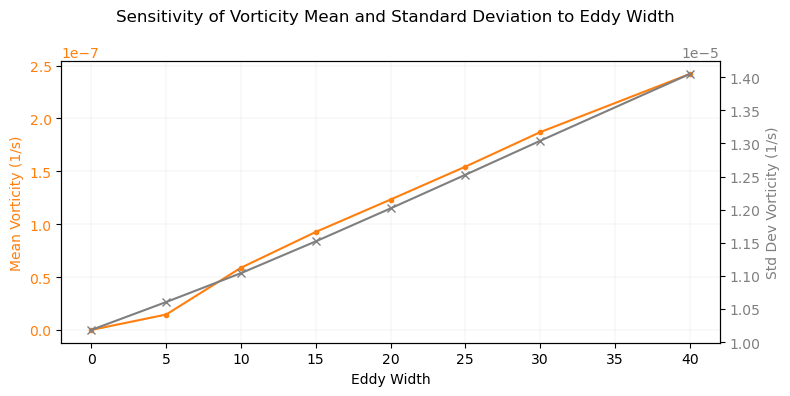

In [ ]:
datasets = [ds_0, ds_5, ds_10, ds_15, ds_20, ds_25, ds_30, ds_40]
eddy_widths = [0, 5, 10, 15, 20, 25, 30, 40]

# store the mean and standard deviation of vorticity
mean_vorticity = []
std_dev_vorticity = []

for ds in datasets:
    mean_vorticity.append(ds['vor'].mean(dim=['time', 'lat', 'lon']).values)
    std_dev_vorticity.append(ds['vor'].std(dim=['time', 'lat', 'lon']).values)

# Convert lists to numpy arrays for easier manipulation
mean_vorticity = np.array(mean_vorticity)
std_dev_vorticity = np.array(std_dev_vorticity)

# Plotting the sensitivity
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot mean vorticity
color = 'tab:orange'
ax1.set_xlabel('Eddy Width')
ax1.set_ylabel('Mean Vorticity (1/s)', color=color)
ax1.plot(eddy_widths, mean_vorticity, marker='o', markersize=3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linewidth=0.1)
# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot standard deviation of vorticity
color = 'tab:gray'
ax2.set_ylabel('Std Dev Vorticity (1/s)', color=color)
ax2.plot(eddy_widths, std_dev_vorticity, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
fig.suptitle('Sensitivity of Vorticity Mean and Standard Deviation to Eddy Width')
fig.tight_layout()  # to ensure the suptitle does not overlap with ax titles

# Show plot
plt.show()


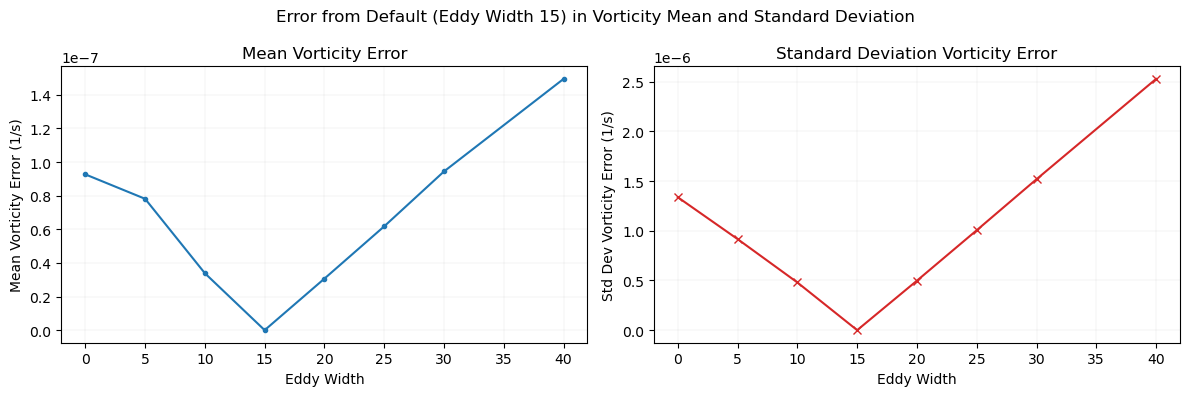

In [ ]:
# Assuming ds_15 is the default dataset and datasets is a list of all datasets including ds_15
datasets = [ds_0, ds_5, ds_10, ds_15, ds_20, ds_25, ds_30, ds_40]
eddy_widths = [0, 5, 10, 15, 20, 25, 30, 40]

# Store the mean and standard deviation of vorticity
mean_vorticity = []
std_dev_vorticity = []

# Calculating mean and standard deviation for all datasets
for ds in datasets:
    mean_vorticity.append(ds['vor'].mean(dim=['time', 'lat', 'lon']).values)
    std_dev_vorticity.append(ds['vor'].std(dim=['time', 'lat', 'lon']).values)

# Convert lists to numpy arrays
mean_vorticity = np.array(mean_vorticity)
std_dev_vorticity = np.array(std_dev_vorticity)

# Calculate the absolute error from the default (ds_15)
default_mean = ds_15['vor'].mean(dim=['time', 'lat', 'lon']).values
default_std_dev = ds_15['vor'].std(dim=['time', 'lat', 'lon']).values
mean_error = np.abs(mean_vorticity - default_mean)
std_dev_error = np.abs(std_dev_vorticity - default_std_dev)

# Plotting the errors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot mean vorticity error
ax1.plot(eddy_widths, mean_error, marker='o', markersize=3, color='tab:blue')
ax1.set_title('Mean Vorticity Error')
ax1.set_xlabel('Eddy Width')
ax1.set_ylabel('Mean Vorticity Error (1/s)')
ax1.grid(True, linewidth=0.1)

# Plot standard deviation vorticity error
ax2.plot(eddy_widths, std_dev_error, marker='x', color='tab:red')
ax2.set_title('Standard Deviation Vorticity Error')
ax2.set_xlabel('Eddy Width')
ax2.set_ylabel('Std Dev Vorticity Error (1/s)')
ax2.grid(True, linewidth=0.1)

fig.suptitle('Error from Default (Eddy Width 15) in Vorticity Mean and Standard Deviation')
plt.tight_layout()
plt.show()


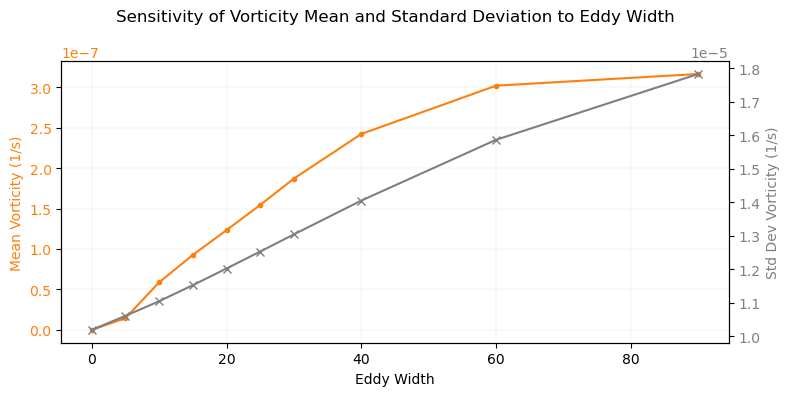

In [ ]:
datasets = [ds_0, ds_5, ds_10, ds_15, ds_20, ds_25, ds_30, ds_40, ds_60, ds_90]
eddy_widths = [0, 5, 10, 15, 20, 25, 30, 40, 60, 90]
var = 'vor'

# store the mean and standard deviation of vorticity
mean_vorticity = []
std_dev_vorticity = []

for ds in datasets:
    mean_vorticity.append(ds[var].mean(dim=['time', 'lat', 'lon']).values)
    std_dev_vorticity.append(ds[var].std(dim=['time', 'lat', 'lon']).values)

# Convert lists to numpy arrays for easier manipulation
mean_vorticity = np.array(mean_vorticity)
std_dev_vorticity = np.array(std_dev_vorticity)

# Plotting the sensitivity
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot mean vorticity
color = 'tab:orange'
ax1.set_xlabel('Eddy Width')
ax1.set_ylabel('Mean Vorticity (1/s)', color=color)
ax1.plot(eddy_widths, mean_vorticity, marker='o', markersize=3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linewidth=0.1)
# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot standard deviation of vorticity
color = 'tab:gray'
ax2.set_ylabel('Std Dev Vorticity (1/s)', color=color)
ax2.plot(eddy_widths, std_dev_vorticity, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
fig.suptitle('Sensitivity of Vorticity Mean and Standard Deviation to Eddy Width')
fig.tight_layout()  # to ensure the suptitle does not overlap with ax titles

# Show plot
plt.show()


In [ ]:
ds

<xarray.Dataset>
Dimensions:   (lon: 256, lonb: 257, lat: 128, latb: 129, time: 25)
Coordinates:
  * lon       (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb      (lonb) float64 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat       (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb      (latb) float64 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 ... 21.0 22.0 23.0 24.0 25.0
Data variables:
    ucomp     (time, lat, lon) float32 ...
    vcomp     (time, lat, lon) float32 ...
    vor       (time, lat, lon) float32 -7.839e-06 -7.839e-06 ... 6.727e-06
    pv        (time, lat, lon) float32 ...
    stream    (time, lat, lon) float32 ...
    trs       (time, lat, lon) float32 ...
    tr        (time, lat, lon) float32 ...
    eddy_vor  (time, lat, lon) float32 ...
    delta_u   (time, lat, lon) float32 ...
Attributes:
    filename:   barotropic.nc
    title:      t85barotropic
    grid_type:  regular
    grid_tile:  N/A

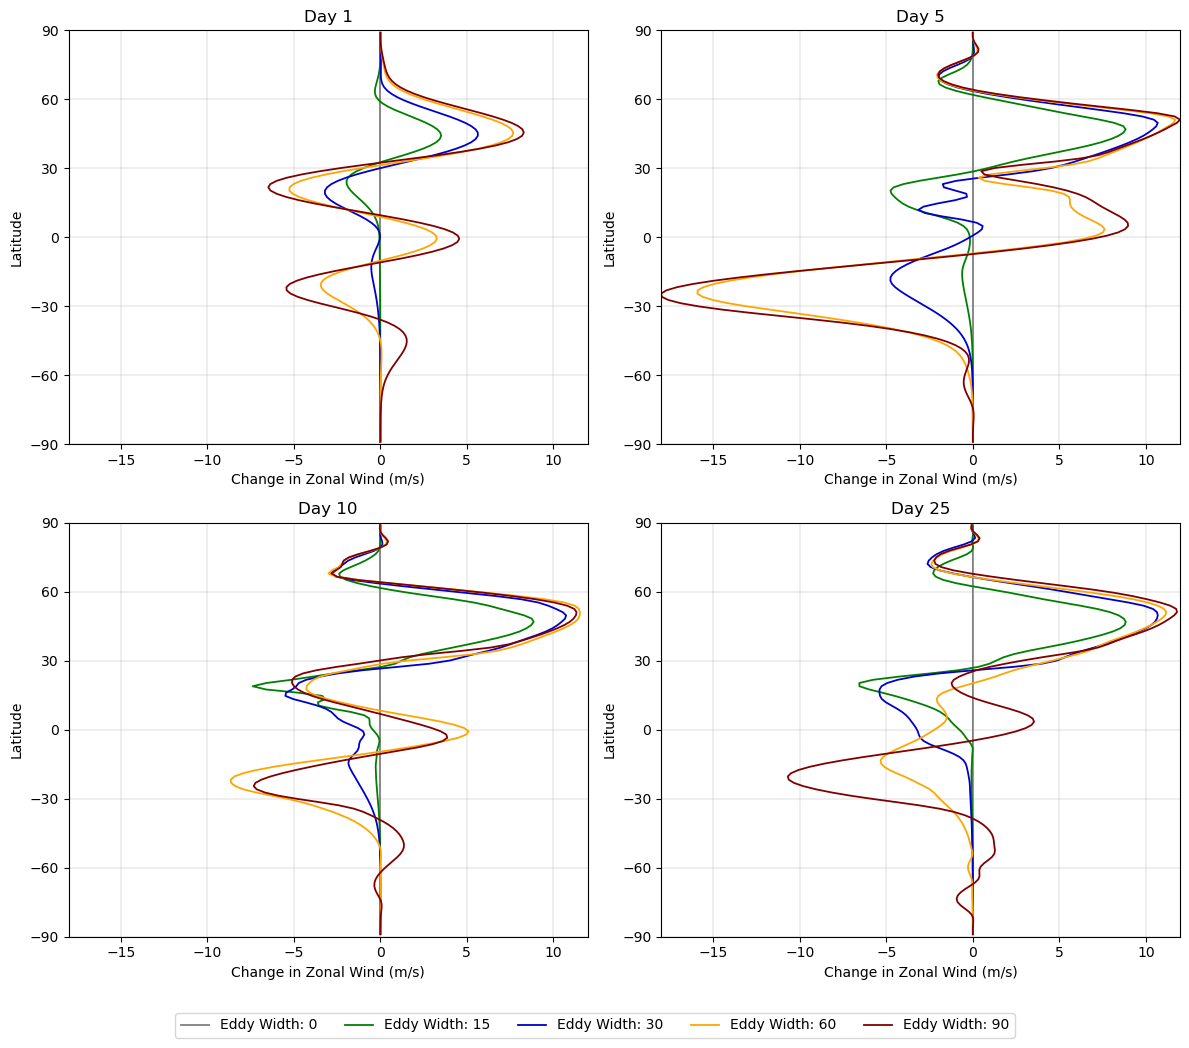

In [16]:
# Assuming datasets and colors are defined as before
datasets = [ds_0, ds_15, ds_30, ds_60, ds_90]
eddy_widths = [0, 15, 30, 60, 90]
colors = ['gray', 'green',  'mediumblue', 'orange',  'maroon']
var = 'delta_u'

# Days to plot
days = [0, 4, 9, 24]  

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), dpi=100) 
axs = axs.flatten()  

global_min = min([ds[var].isel(time=day).min().values for day in days for ds in datasets])
global_max = max([ds[var].isel(time=day).max().values for day in days for ds in datasets])

for j, day in enumerate(days):
    for i, ds in enumerate(datasets):
        ds_selected_day = ds[var].isel(time=day)
        mean_lat = ds_selected_day.mean(dim='lon').values
        latitudes = ds['lat'].values

        # Ensure mean_vorticity_lat is 1D
        if mean_lat.ndim > 1:
            mean_lat = mean_lat.squeeze()

        # Plotting for each eddy width on the specified day
        axs[j].plot(mean_lat, latitudes, color=colors[i], linewidth=1.3, label=f'Eddy Width: {eddy_widths[i]}' if j == 0 else "_nolegend_")

    axs[j].set_xlabel('Change in Zonal Wind (m/s)')
    axs[j].set_ylabel('Latitude')
    axs[j].set_title(f'Day {day + 1}')
    axs[j].grid(True, linewidth=0.3)
    
    # Set the same Y-axis and X-axis limits for all subplots
    axs[j].set_ylim(-90, 90)
    axs[j].set_yticks(np.arange(-90, 91, 30)) 
    axs[j].set_xlim(global_min, global_max)

# # Adding a legend to the first subplot
# axs[0].legend(loc='upper right')

# Create a legend below the full image
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(datasets), bbox_to_anchor=(0.5, -0.05))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig('/scratch/tsany/CLIM711/Lat Profile.png')
# Show plot
plt.show()



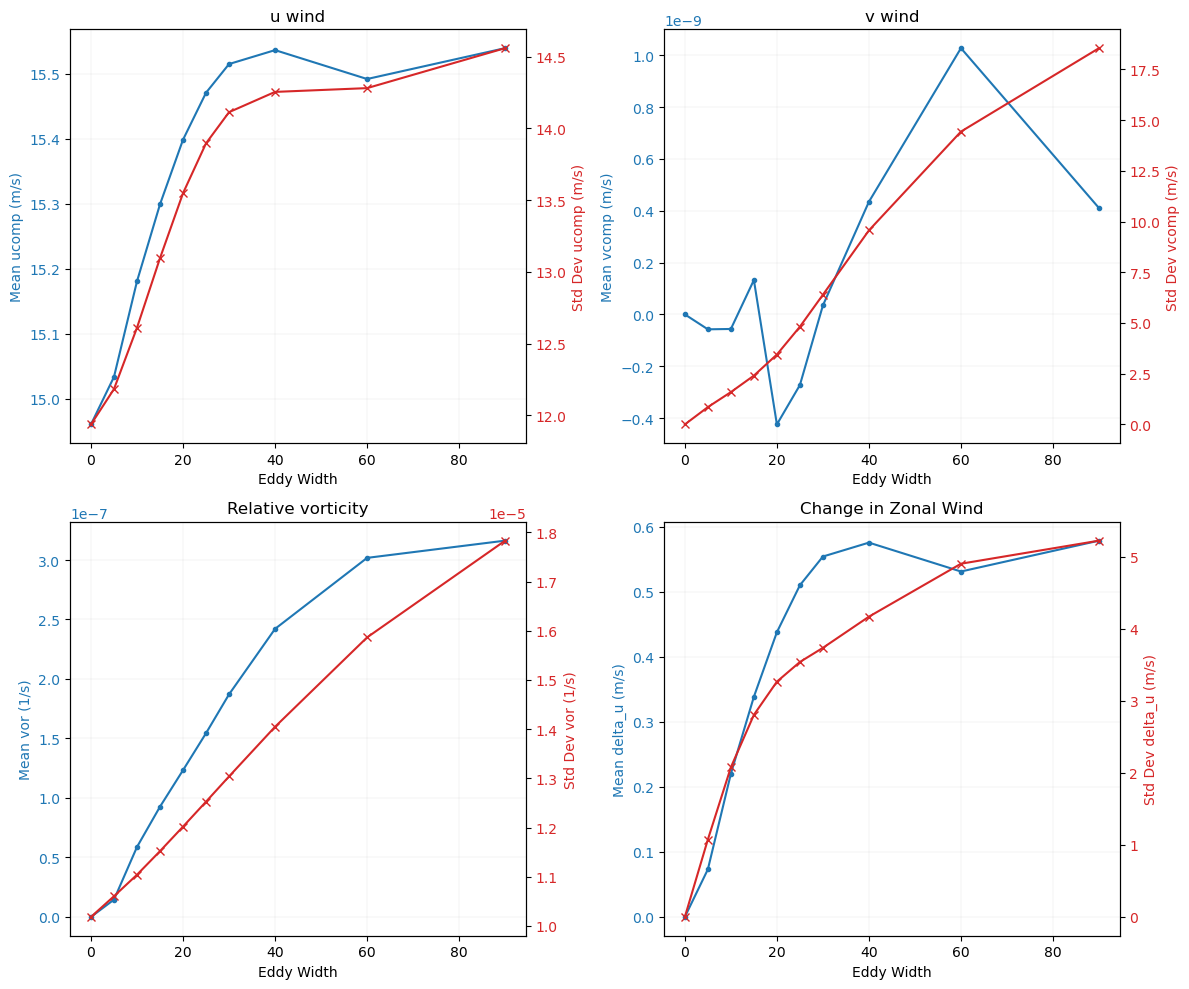

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assume 'datasets' is a list of datasets already defined
datasets = [ds_0, ds_5, ds_10, ds_15, ds_20, ds_25, ds_30, ds_40, ds_60, ds_90]
eddy_widths = [0, 5, 10, 15, 20, 25, 30, 40, 60, 90]

# Variables to plot
variables = ['ucomp', 'vcomp', 'vor', 'delta_u'] 
variables_name = ['u wind', 'v wind', 'Relative vorticity', 'Change in Zonal Wind'] 
units = ['m/s','m/s', '1/s', 'm/s' ]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12,10),dpi=100) 
axs = axs.flatten() 

for i, var in enumerate(variables):
    mean_values = []
    std_dev_values = []

    # Calculate the mean and standard deviation for each dataset
    for ds in datasets:
        mean_values.append(ds[var].mean(dim=['time', 'lat', 'lon']).values)
        std_dev_values.append(ds[var].std(dim=['time', 'lat', 'lon']).values)

    # Convert lists to numpy arrays for easier manipulation
    mean_values = np.array(mean_values)
    std_dev_values = np.array(std_dev_values)

    # Plot mean values
    color = 'tab:blue'
    axs[i].set_xlabel('Eddy Width')
    axs[i].set_ylabel(f'Mean {var} ({units[i]})', color=color)  # Replace 'units' with actual units
    axs[i].plot(eddy_widths, mean_values, marker='o', markersize=3, color=color)
    axs[i].tick_params(axis='y', labelcolor=color)
    axs[i].grid(True, linewidth=0.1)

    # Plot standard deviation of values
    color = 'tab:red'
    ax2 = axs[i].twinx()
    ax2.set_ylabel(f'Std Dev {var} ({units[i]})', color=color)  # Replace 'units' with actual units
    ax2.plot(eddy_widths, std_dev_values, marker='x', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Set title for each subplot
    # axs[i].set_title(f'Sensitivity of {variables_name[i]} Mean and Std Dev to Eddy Width')
    axs[i].set_title(f'{variables_name[i]}')
    
plt.tight_layout()
plt.savefig('/scratch/tsany/CLIM711/Sensitivity.png')
# Show plot
plt.show()
